In [ ]:
import torch
from torch import Tensor
import torch.nn as nn
from torch.nn import functional as F
import random
from typing import Dict
import pandas as pd
from collections import defaultdict, deque, OrderedDict
import numpy as np

# checkpoint = torch.load('/data/dataset/Epickitchens100_clips/epic_checkpoint-2400.pth')
v2_checkpoint = torch.load('/data/joohyun7u/project/CAST/clip_models/videomae_b_1600_checkpoint.pth', map_location=torch.device('cpu'))

/tmp/ipykernel_1282216/3761979770.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  v2_checkpoint = torch.load('/data/joohyun7u/project/CAST/clip_models/videomae_b_1600_c

In [ ]:
for key in checkpoint['model'].keys():
    print(key)

In [ ]:
for key in v2_checkpoint['model'].keys():
    print(key)

In [ ]:
import pickle
import pandas as pd

# 파일 경로
hd_anno_path = '/data/joohyun7u/project/CAST/hd-epic-annotations/narrations-and-action-segments/HD_EPIC_Narrations.pkl'


# pickle 파일을 바이너리 읽기 모드(rb)로 엽니다.
with open(hd_anno_path, 'rb') as f:
    # 파일 내용을 로드합니다.
    data = pickle.load(f)


In [ ]:
import pickle
import pandas as pd

hd_anno_path = '/data/joohyun7u/project/CAST/hd-epic-annotations/narrations-and-action-segments/HD_EPIC_Narrations.json'

hd_data = pd.read_json(hd_anno_path, lines=True)


In [ ]:
hd_data[hd_data['unique_narration_id'] == 'P02-20240211-141313-664']

,unique_narration_id,participant_id,video_id,narration,start_timestamp,end_timestamp,nouns,verbs,pairs,main_actions,verb_classes,noun_classes,pair_classes,main_action_classes,hands,narration_timestamp
13967,P02-20240211-141313-664,P02,P02-20240211-141313,place the recipe book down onto the countertop...,1423.45,1423.77,"[recipe book, countertop]",[place down],"[[place down, recipe book]]","[[place down, recipe book]]",[1],"[140, 42]","[[1, 140]]","[[1, 140]]",[right hand],1423.633573


In [ ]:
hd_data

,unique_narration_id,participant_id,video_id,narration,start_timestamp,end_timestamp,nouns,verbs,pairs,main_actions,verb_classes,noun_classes,pair_classes,main_action_classes,hands,narration_timestamp
0,P01-20240202-110250-1,P01,P01-20240202-110250,Open the upper cupboard by holding the handle...,7.440,8.75000,"[upper cupboard, handle of cupboard]","[open, hold]","[[open, upper cupboard], [hold, handle of cupb...","[[open, upper cupboard]]","[3, 34]","[3, 3]","[[3, 3], [34, 3]]","[[3, 3]]",[left hand],8.000000
1,P01-20240202-110250-2,P01,P01-20240202-110250,Stretch the left hand inside the cupboard in ...,8.850,9.36000,"[cupboard, lower shelf, mug, far side of cupbo...","[stretch, reach]","[[stretch, left hand], [reach, mug]]","[[stretch, left hand]]","[50, 98]","[3, 247, 13, 3]","[[50, 11], [98, 13]]","[[50, 11]]",[left hand],9.666667
2,P01-20240202-110250-3,P01,P01-20240202-110250,Pick up a mug from the lower shelf of the cup...,9.340,11.16000,"[mug, lower shelf of cupboard]",[pick up],"[[pick up, mug]]","[[pick up, mug]]",[0],"[13, 3]","[[0, 13]]","[[0, 13]]",[left hand],10.833333
3,P01-20240202-110250-4,P01,P01-20240202-110250,Turn the mug in the left hand to face the cam...,11.150,11.60000,"[mug, camera]","[turn, face]","[[turn, mug], [face, camera]]","[[turn, mug]]","[23, 11]","[13, 297]","[[23, 13], [11, 297]]","[[23, 13]]",[left hand],11.466667
4,P01-20240202-110250-5,P01,P01-20240202-110250,Close the cupboard using the right hand.,11.500,12.18000,[cupboard],[close],"[[close, cupboard]]","[[close, cupboard]]",[4],[3],"[[4, 3]]","[[4, 3]]",[right hand],11.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59449,P09-20240623-120359-373-4,P09,P09-20240623-120359,rinse and wash the frying pan under the runnin...,1248.871,1250.47771,"[running tap, frying pan]","[wash, rinse]","[[rinse, frying pan], [wash, frying pan]]","[[rinse, frying pan]]","[2, 2]","[0, 5]","[[2, 5], [2, 5]]","[[2, 5]]",[right hand],1250.221000
59450,P09-20240623-120359-373-5,P09,P09-20240623-120359,rotate the frying pan in the kitchen sink with...,1250.380,1251.38000,"[frying pan, kitchen sink]",[rotate],"[[rotate, frying pan]]","[[rotate, frying pan]]",[23],"[5, 63]","[[23, 5]]","[[23, 5]]",[right hand],1251.505000
59451,P09-20240623-120359-373-6,P09,P09-20240623-120359,swirl the frying pan under the running tap wat...,1251.260,1253.07771,"[areas of surface, running tap water, frying pan]","[swirl, rinse]","[[swirl, frying pan], [rinse, areas of surface]]","[[swirl, frying pan]]","[15, 2]","[42, 27, 5]","[[15, 5], [2, 42]]","[[15, 5]]",[],1252.485000
59452,P09-20240623-120359-373-7,P09,P09-20240623-120359,tip the frying pan in the right hand to pour o...,1252.964,1253.96400,"[frying pan, water]","[tip, pour out]","[[tip, frying pan], [pour out, water]]","[[tip, frying pan]]","[1, 9]","[5, 27]","[[1, 5], [9, 27]]","[[1, 5]]",[right hand],1253.689000


In [ ]:
import pandas as pd

# CSV 파일 경로
train_csv_path = '/data/joohyun7u/project/CAST/dataset/epic/epic100_train_gpt2_xl.csv'
val_csv_path = '/data/joohyun7u/project/CAST/dataset/epic/epic100_val_gpt2_xl.csv'

# CSV 파일 로드
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# 'narration_id'에서 주방 환경 ID (P0*) 추출
train_kitchens = set(train_df['narration_id'].str.split('_').str[0])
val_kitchens = set(val_df['narration_id'].str.split('_').str[0])

# 각 데이터셋의 주방 환경 출력
print(f"Train 주방 환경 ({len(train_kitchens)}개):")
print(sorted(list(train_kitchens)))
print("-" * 30)

print(f"Validation 주방 환경 ({len(val_kitchens)}개):")
print(sorted(list(val_kitchens)))
print("-" * 30)

# Train 데이터셋에 없는 Validation 주방 환경 찾기
unseen_kitchens_in_val = val_kitchens - train_kitchens

print(f"Train에서 보지 못한 Validation 주방 환경 ({len(unseen_kitchens_in_val)}개):")
print(sorted(list(unseen_kitchens_in_val)))
print("-" * 30)

# Train에서 보지 못한 주방 환경만 val 데이터에서 필터링
val_df['kitchen_id'] = val_df['narration_id'].str.split('_').str[0]
unseen_val_df = val_df[val_df['kitchen_id'].isin(unseen_kitchens_in_val)].copy()

# 불필요한 'kitchen_id' 열 삭제
unseen_val_df = unseen_val_df.drop(columns=['kitchen_id'])


print("Train에 없는 주방 환경만 포함된 Validation 데이터프레임:")
unseen_val_df

Train 주방 환경 (32개):
['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P35', 'P37']
------------------------------
Validation 주방 환경 (32개):
['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32']
------------------------------
Train에서 보지 못한 Validation 주방 환경 (2개):
['P18', 'P32']
------------------------------
Train에 없는 주방 환경만 포함된 Validation 데이터프레임:


,narration_id,verb_class,noun_class,action_class,verb,noun,narration,all_nouns,all_noun_classes,lavila_narrator,start_timestamp,stop_timestamp,start_frame,stop_frame
4525,P18_01_0,0,7,7,take,bowl,take bowl,['bowl'],[7],"['#C C picks a bowl.', '#C C picks a bowl from...",00:00:03.64,00:00:05.49,218,329
4526,P18_01_1,3,3,903,open,cupboard,open cupboard,['cupboard'],[3],['#C C hangs the plate on the wall with his le...,00:00:05.31,00:00:06.78,318,406
4527,P18_01_10,9,27,2727,pour-in,water,pour water in coffee machine,"['water', 'machine:coffee']","[27, 50]","['#C C puts on the coffee maker', '#C C puts o...",00:00:29.48,00:00:37.26,1768,2235
4528,P18_01_11,5,50,1550,put-in,pot:coffee,put coffee pot in coffee machine,"['pot:coffee', 'machine:coffee']","[50, 50]","['#C C closes the coffee maker.', '#C C closes...",00:00:37.36,00:00:41.81,2241,2508
4529,P18_01_12,3,3,903,open,cupboard,open cupboard,['cupboard'],[3],"['#C C opens a cupboard with her left hand', '...",00:00:42.46,00:00:43.34,2547,2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,P32_10_5,44,22,13222,spray,degreaser,spray degreaser,['degreaser'],[22],"['#C C picks a kitchen towel', '#C C picks the...",00:01:14.36,00:01:17.04,4461,4622
9664,P32_10_6,2,46,646,wash,cooker,wash cooker,['cooker'],[46],['#C C wipes the countertop with a kitchen tow...,00:01:18.69,00:01:33.75,4721,5625
9665,P32_10_7,2,46,646,rinse,cooker,rinse cooker,['cooker'],[46],['#C C picks the cloth from the gas cooker wit...,00:01:39.52,00:01:59.64,5971,7178
9666,P32_10_8,2,17,617,rinse,cloth,rinse cloth,['cloth'],[17],"['#C C closes tap', '#C C closes the tap', '#C...",00:02:00.48,00:02:09.11,7228,7746


# EpicSounds Unseen

In [ ]:
import pandas as pd
# 예측 결과 파일 경로
pred_csv_path = '/data/joohyun7u/project/CAST/log_rebuttal/EKSound_ASTCLIP_split_time_encoding_v5_MixSpecCut_AddNoise_UF4/pred_result.csv'
# pred_csv_path = '/data/joohyun7u/project/CAST/log_rebuttal/7011437_CAVA_EPSound_reproduce_eval/pred_result.csv'

# 예측 결과 파일 로드
pred_df = pd.read_csv(pred_csv_path)

# 'Video_id'에서 주방 환경 ID (P**) 추출
pred_df['kitchen_id'] = pred_df['video_id'].str.split('_').str[0]

# Train에서 보지 못한 주방 환경(P18, P32)에 대한 예측만 필터링
# unseen_kitchens_in_val = {'P18', 'P32'}
unseen_pred_df = pred_df[pred_df['kitchen_id'].isin(unseen_kitchens_in_val)].copy()

# Top-1 정확도(acc1) 계산
# 'Pred_Label'과 'True_Label'이 같으면 True(1), 다르면 False(0)
# 이 값들의 평균을 구하면 정확도가 됩니다.
acc1 = (unseen_pred_df['pred'] == unseen_pred_df['label']).mean()

print(f"Unseen kitchens ({', '.join(sorted(list(unseen_kitchens_in_val)))}) Top-1 Accuracy: {acc1*100:.4f}%")

# 필터링된 데이터프레임 확인
unseen_pred_df

Unseen kitchens (P18, P32) Top-1 Accuracy: 62.3389%


,video_id,pred,label,conf,kitchen_id
277,P18_01_4,metal-only collision,metal-only collision,0.7559,P18
278,P18_01_20,plastic-only collision,metal / paper collision,0.3607,P18
279,P18_02_6,water,water,0.7542,P18
280,P18_03_8,rustle,rustle,0.8732,P18
281,P18_03_24,rustle,rustle,0.8180,P18
...,...,...,...,...,...
8030,P32_09_17,metal-only collision,metal-only collision,0.8328,P32
8031,P32_10_14,metal-only collision,metal-only collision,0.8758,P32
8032,P32_10_30,footstep,footstep,0.6908,P32
8033,P32_10_46,metal-only collision,metal-only collision,0.3992,P32


# EK100 Unseen (P18, P32)

In [ ]:
import pandas as pd
# 예측 결과 파일 경로
pred_csv_path = '/data/joohyun7u/project/CAST/log_rebuttal/7012125_CAST_eval/pred_result.csv'

# 예측 결과 파일 로드
pred_df = pd.read_csv(pred_csv_path)

# 'Video_id'에서 주방 환경 ID (P**) 추출
pred_df['kitchen_id'] = pred_df['video_id'].str.split('_').str[0]

# Train에서 보지 못한 주방 환경(P18, P32)에 대한 예측만 필터링
# unseen_kitchens_in_val = {'P18', 'P32'}
unseen_pred_df = pred_df[pred_df['kitchen_id'].isin(unseen_kitchens_in_val)].copy()

# Top-1 정확도(acc1) 계산
# 'Pred_Label'과 'True_Label'이 같으면 True(1), 다르면 False(0)
# 이 값들의 평균을 구하면 정확도가 됩니다.
acc1 = ((unseen_pred_df['verb'] == unseen_pred_df['label_verb']) & (unseen_pred_df['noun'] == unseen_pred_df['label_noun'])).mean()

print(f"Unseen kitchens ({', '.join(sorted(list(unseen_kitchens_in_val)))}) Top-1 Accuracy: {acc1*100:.4f}%")

# 필터링된 데이터프레임 확인
unseen_pred_df

Unseen kitchens (P18, P32) Top-1 Accuracy: 39.1549%


,video_id,verb,noun,label_verb,label_noun,conf_verb,conf_noun,action,kitchen_id
755,P18_01_13,take,rice,take,filter,0.8581,0.1106,take rice,P18
756,P18_01_19,take,spoon,open,coffee,0.5093,0.3743,take spoon,P18
757,P18_01_24,close,drawer,close,drawer,0.5591,0.4435,close drawer,P18
758,P18_01_3,close,cupboard,close,cupboard,0.8705,0.8452,close cupboard,P18
759,P18_01_35,take,fork,take,knife,0.8353,0.6113,take fork,P18
...,...,...,...,...,...,...,...,...,...
9663,P32_10_22,wash,maker:coffee,dry,hob,0.3560,0.1827,wash maker:coffee,P32
9664,P32_10_28,put,cupboard,put,liquid:washing,0.4861,0.1729,put cupboard,P32
9665,P32_10_33,wash,sink,squeeze,cloth,0.2969,0.4703,wash sink,P32
9666,P32_10_39,throw,napkin,throw,paper,0.8622,0.4070,throw napkin,P32


np.float64(0.6233894945490585)

# Visualization

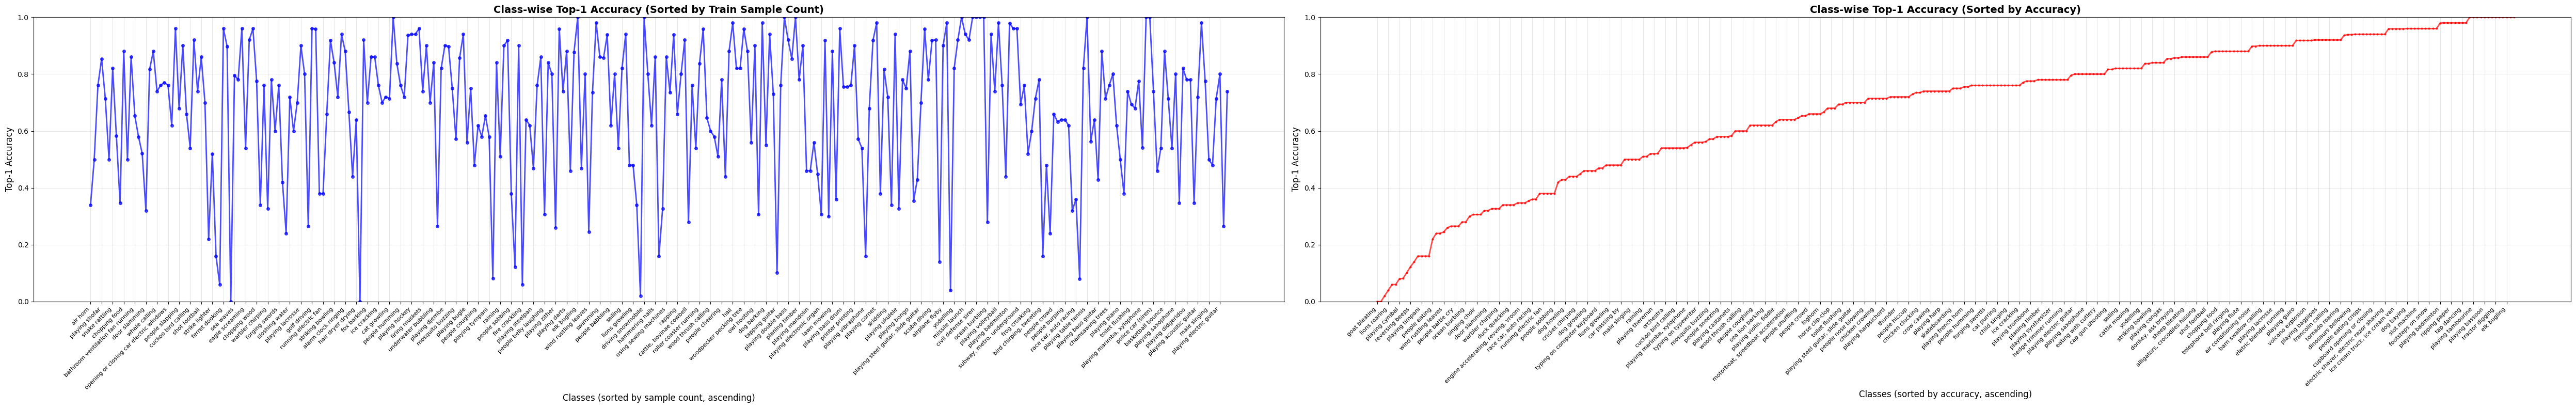


=== 샘플 수 기준 정렬 (상위 10개) ===
                    class  train_total_samples  total_samples  accuracy
0                air horn                  145             50  0.340000
1              cow lowing                  146             50  0.500000
2         disc scratching                  147             50  0.760000
3          playing shofar                  147             48  0.854167
4   fly, housefly buzzing                  147             49  0.714286
5           zebra braying                  147             50  0.500000
6          snake rattling                  148             50  0.820000
7       playing castanets                  148             48  0.583333
8  people finger snapping                  148             49  0.346939
9           chopping food                  149             50  0.880000

=== 정확도 기준 정렬 (하위 10개) ===
             class  train_total_samples  total_samples  accuracy
0    goat bleating                  196             50  0.000000
1   bird squawking   

In [ ]:
# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 6)

# 1. 샘플 수 순으로 정렬 (값이 적은 순)
class_df_by_samples = class_df.sort_values('train_total_samples', ascending=True).reset_index(drop=True)
# 2. 정확도 순으로 정렬
class_df_by_accuracy = class_df.sort_values('accuracy', ascending=True).reset_index(drop=True)

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 8))

# 첫 번째 그래프: 샘플 수 순 정렬
ax1.plot(range(len(class_df_by_samples)), class_df_by_samples['accuracy'], 
         marker='o', linewidth=2, markersize=4, color='blue', alpha=0.7)
ax1.set_title('Class-wise Top-1 Accuracy (Sorted by Train Sample Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Classes (sorted by sample count, ascending)', fontsize=12)
ax1.set_ylabel('Top-1 Accuracy', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# x축 레이블 설정 (일부만 표시)
step = max(1, len(class_df_by_samples) // 100)  # 최대 20개 레이블만 표시
ax1.set_xticks(range(0, len(class_df_by_samples), step))
ax1.set_xticklabels([f"{class_df_by_samples.iloc[i]['class']}" 
                     for i in range(0, len(class_df_by_samples), step)], 
                    rotation=45, ha='right', fontsize=8)

# 두 번째 그래프: 정확도 순 정렬
ax2.plot(range(len(class_df_by_accuracy)), class_df_by_accuracy['accuracy'], 
         marker='o', linewidth=2, markersize=2, color='red', alpha=0.7)
ax2.set_title('Class-wise Top-1 Accuracy (Sorted by Accuracy)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Classes (sorted by accuracy, ascending)', fontsize=12)
ax2.set_ylabel('Top-1 Accuracy', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

# x축 레이블 설정 (일부만 표시)
ax2.set_xticks(range(0, len(class_df_by_accuracy), step))
ax2.set_xticklabels([f"{class_df_by_accuracy.iloc[i]['class']}" 
                     for i in range(0, len(class_df_by_accuracy), step)], 
                    rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("\n=== 샘플 수 기준 정렬 (상위 10개) ===")
print(class_df_by_samples.head(10))

print("\n=== 정확도 기준 정렬 (하위 10개) ===")
print(class_df_by_accuracy.head(10))

print("\n=== 정확도 기준 정렬 (상위 10개) ===")
print(class_df_by_accuracy.tail(10))

print(f"\n전체 평균 정확도: {class_df['accuracy'].mean():.4f}")
print(f"가중 평균 정확도: {(class_df['accuracy'] * class_df['total_samples']).sum() / class_df['total_samples'].sum():.4f}")

In [ ]:
import pandas as pd
ours_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTCLIP_VMHY_MixSpecCut_AddNoise/pred_result.csv'
audio_only_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTOnly2/pred_result.csv'
ours_df = pd.read_csv(ours_path)
audio_only_df = pd.read_csv(audio_only_path)

In [ ]:
audio_only_df

,video_id,pred,label,conf
0,glLQrEijrKg_000300,playing hammond organ,playing hammond organ,0.4813
1,hsmrvZEc_uw_000150,playing piano,playing electronic organ,0.5579
2,QXnFAcMyAHA_000030,playing harp,playing harp,0.9304
3,puoRo9q7-ec_000009,disc scratching,disc scratching,0.9079
4,1NkUBIl2Plw_000030,thunder,raining,0.2059
...,...,...,...,...
15336,l7Wo_s7HFIY_000190,people screaming,ambulance siren,0.3103
15337,Bf2m1sXaXk4_000010,train horning,"railroad car, train wagon",0.9669
15338,-uD3ZbhFTnk_000077,baltimore oriole calling,baltimore oriole calling,0.4630
15339,JcMhOe-DHoE_000018,sea waves,sea waves,0.9281


In [ ]:
ours_df

,video_id,pred,label,conf
0,glLQrEijrKg_000300,playing electronic organ,playing hammond organ,0.6662
1,hsmrvZEc_uw_000150,playing piano,playing electronic organ,0.8863
2,QXnFAcMyAHA_000030,playing harp,playing harp,0.8847
3,puoRo9q7-ec_000009,disc scratching,disc scratching,0.9138
4,1NkUBIl2Plw_000030,thunder,raining,0.3325
...,...,...,...,...
15336,l7Wo_s7HFIY_000190,police car (siren),ambulance siren,0.2699
15337,Bf2m1sXaXk4_000010,train horning,"railroad car, train wagon",0.8400
15338,-uD3ZbhFTnk_000077,baltimore oriole calling,baltimore oriole calling,0.3249
15339,JcMhOe-DHoE_000018,sea waves,sea waves,0.8550


In [ ]:
result_df = pd.read_csv('/data/joohyun7u/project/CAST/vggsound_class_wise_stats.csv')
result_df

,class,train_total_samples,total_samples,accuracy,audio_only_accuracy,f1_score,audio_only_f1_score,f1_difference
0,playing hammond organ,990,50,0.240000,0.320000,0.338028,0.376471,-0.038442
1,playing electronic organ,782,49,0.306122,0.285714,0.357143,0.329412,0.027731
2,playing harp,994,50,0.740000,0.740000,0.762887,0.718447,0.044440
3,disc scratching,147,50,0.760000,0.620000,0.808511,0.704545,0.103965
4,raining,423,49,0.510204,0.387755,0.500000,0.376238,0.123762
...,...,...,...,...,...,...,...,...
304,spraying water,228,50,0.700000,0.300000,0.736842,0.410959,0.325883
305,playing bassoon,995,48,1.000000,0.979167,0.989691,0.969072,0.020619
306,warbler chirping,210,49,0.326531,0.122449,0.421053,0.193548,0.227504
307,ocean burbling,932,50,0.280000,0.200000,0.311111,0.277778,0.033333


# Class-wise F1 Score 및 Train 샘플 통계 생성
audio_only_df, ours_df, train_df를 이용해 result_df를 생성합니다.
- 각 class별 audio_only/ours f1 score
- train 샘플 수
- improvement (ours - audio_only)

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score


ours_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTCLIP_VMHY_MixSpecCut_AddNoise/pred_result.csv'
audio_only_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTOnly2/pred_result.csv'
train_csv_path = '/data/joohyun7u/project/CAST/dataset/vggsound/train_sel.csv'
ours_df = pd.read_csv(ours_path)
audio_only_df = pd.read_csv(audio_only_path)
train_df = pd.read_csv(train_csv_path)

# class 목록 추출
classes = sorted(list(set(ours_df['label']).union(set(audio_only_df['label']))))

# 클래스별 f1 score 계산 함수
def compute_class_f1(df, class_list):
    f1_dict = {}
    for cls in class_list:
        y_true = (df['label'] == cls).astype(int)
        y_pred = (df['pred'] == cls).astype(int)
        if y_true.sum() == 0 and y_pred.sum() == 0:
            f1 = np.nan
        else:
            f1 = f1_score(y_true, y_pred, zero_division=0)
        f1_dict[cls] = f1
    return f1_dict

audio_f1 = compute_class_f1(audio_only_df, classes)
ours_f1 = compute_class_f1(ours_df, classes)

# train 샘플 수 집계
train_sample_dict = train_df['narration'].value_counts().to_dict()

# result_df 생성
result_df = pd.DataFrame({
    'class': classes,
    'audio_only_f1': [audio_f1[cls] for cls in classes],
    'ours_f1': [ours_f1[cls] for cls in classes],
    'train_total_samples': [train_sample_dict.get(cls, 0) for cls in classes]
})
result_df['improvement'] = result_df['ours_f1'] - result_df['audio_only_f1']

result_df = result_df.sort_values('class').reset_index(drop=True)
result_df

,class,audio_only_f1,ours_f1,train_total_samples,improvement
0,air conditioning noise,0.744681,0.897959,192,0.153278
1,air horn,0.369231,0.500000,145,0.130769
2,airplane,0.463158,0.688889,448,0.225731
3,airplane flyby,0.780000,0.909091,904,0.129091
4,alarm clock ringing,0.778947,0.862745,281,0.083798
...,...,...,...,...,...
304,wood thrush calling,0.536082,0.576923,629,0.040841
305,woodpecker pecking tree,0.694215,0.854545,690,0.160331
306,writing on blackboard with chalk,0.500000,0.689655,226,0.189655
307,yodelling,0.707965,0.700855,907,-0.007110


In [5]:
from sklearn.metrics import f1_score

# =================================================
# 1) 평가용 정답(label)과 두 모델의 예측값(pred) 정리
# -------------------------------------------------
# ※ 두 CSV 모두 같은 순서·길이의 샘플이어야 합니다.
y_true            = ours_df['label']
y_pred_ours       = ours_df['pred']
y_pred_audio_only = audio_only_df['pred']

# =================================================
# 2) 전체 weighted F1 계산
# -------------------------------------------------
average = 'micro'  # 'macro', 'micro', 'weighted' 중 선택 가능
f1_ours       = f1_score(y_true, y_pred_ours,       average=average)
f1_audio_only = f1_score(y_true, y_pred_audio_only, average=average)

overall_improvement = f1_ours - f1_audio_only

# =================================================
# 3) 결과 출력
# -------------------------------------------------
print(f"OURS  weighted F1 : {f1_ours:.4f}")
print(f"AUDIO weighted F1 : {f1_audio_only:.4f}")
print(f"Δ Improvement     : {overall_improvement:+.4f}")


OURS  weighted F1 : 0.6822
AUDIO weighted F1 : 0.5838
Δ Improvement     : +0.0984


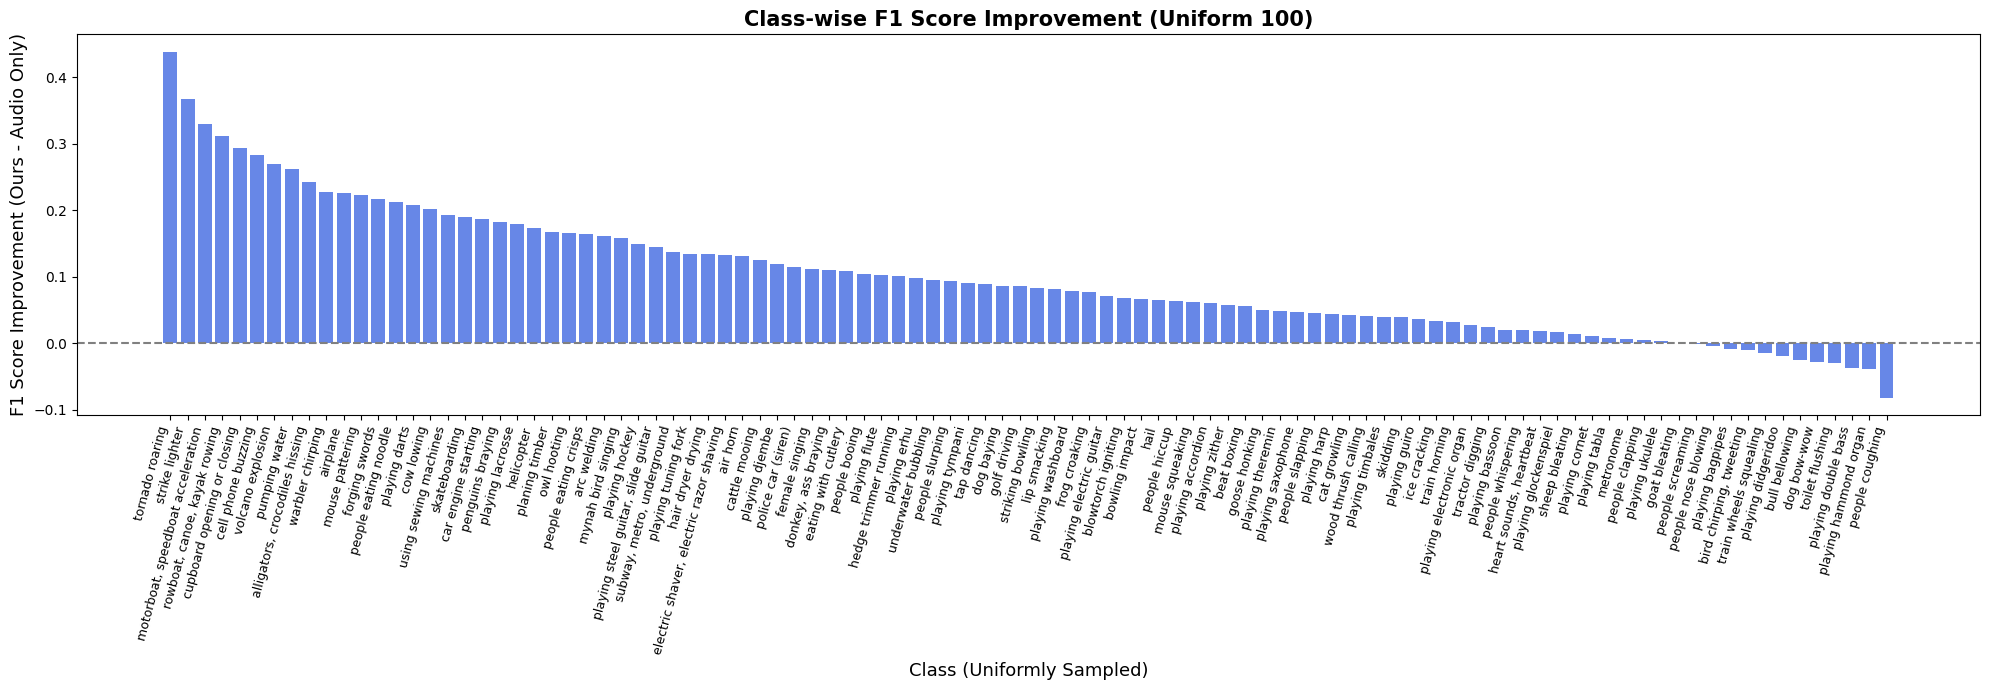

그래프가 classwise_f1_improvement_uniform100.pdf로 저장되었습니다.


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 개선분 기준으로 정렬
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# 전체 클래스에서 균등하게 100개 샘플링 (index 기준)
num_classes = len(df_plot)
num_show = 100
if num_classes > num_show:
    indices = np.linspace(0, num_classes-1, num_show, dtype=int)
    df_plot_uniform = df_plot.iloc[indices].reset_index(drop=True)
else:
    df_plot_uniform = df_plot.copy()

plt.figure(figsize=(20, 7))
plt.bar(df_plot_uniform['class'], df_plot_uniform['improvement'], color='royalblue', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('F1 Score Improvement (Ours - Audio Only)', fontsize=13)
plt.xlabel('Class (Uniformly Sampled)', fontsize=13)
plt.title('Class-wise F1 Score Improvement (Uniform 100)', fontsize=15, fontweight='bold')
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.tight_layout()
plt.savefig('classwise_f1_improvement_uniform100.pdf')
plt.show()
print('그래프가 classwise_f1_improvement_uniform100.pdf로 저장되었습니다.')

# 상위/하위 10개 클래스 출력
# print('Top 10 Improved Classes:')
# print(df_plot.head(10)[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])
# print('\nBottom 10 Classes:')
# print(df_plot.tail(10)[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])

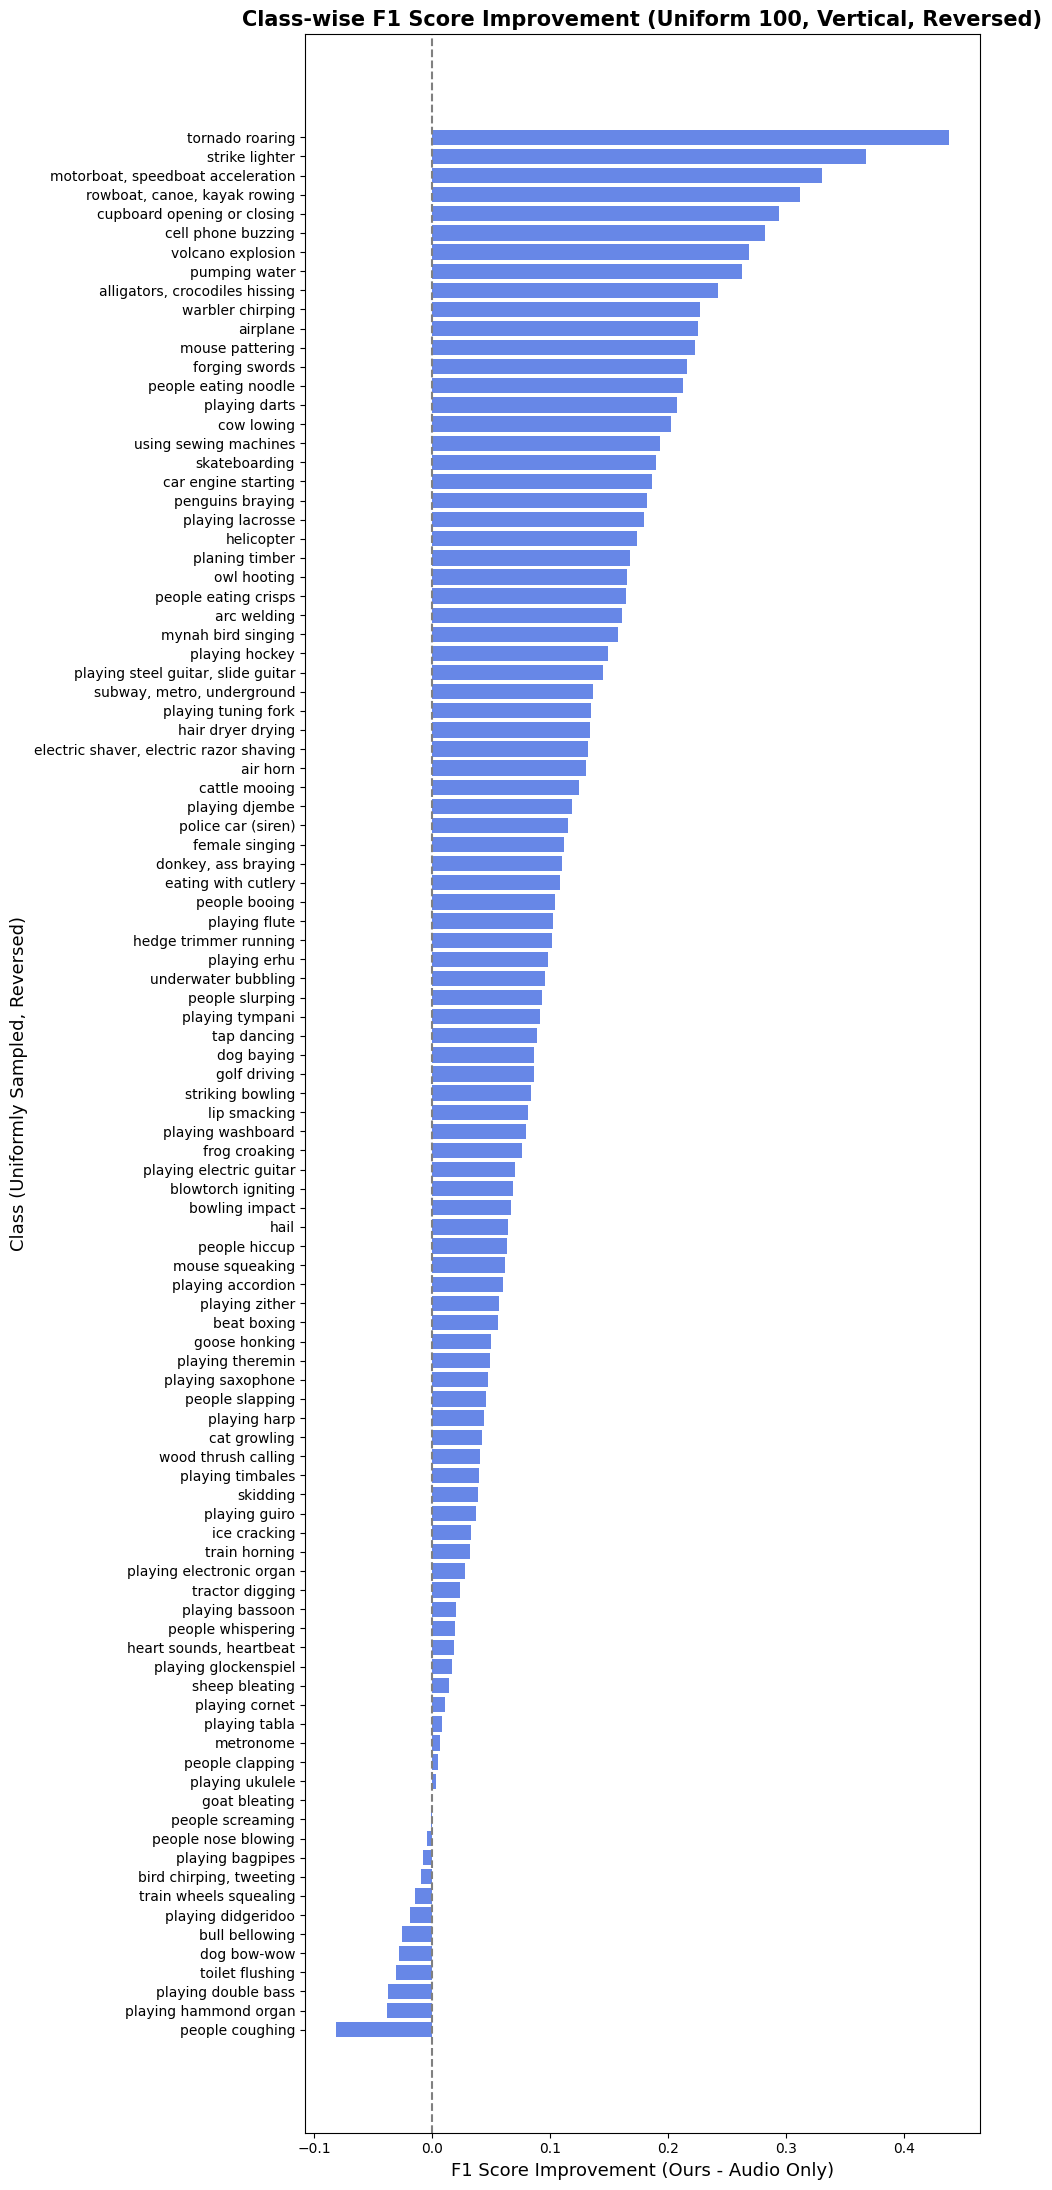

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 개선분 기준으로 정렬
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# 전체 클래스에서 균등하게 100개 샘플링 (index 기준)
num_classes = len(df_plot)
num_show = 100
if num_classes > num_show:
    indices = np.linspace(0, num_classes-1, num_show, dtype=int)
    df_plot_uniform = df_plot.iloc[indices].reset_index(drop=True)
else:
    df_plot_uniform = df_plot.copy()

# 역순(개선도 낮은 클래스가 위, 높은 클래스가 아래)으로 시각화
plt.figure(figsize=(10, 22))
plt.barh(df_plot_uniform['class'][::-1], df_plot_uniform['improvement'][::-1], color='royalblue', alpha=0.8)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('F1 Score Improvement (Ours - Audio Only)', fontsize=13)
plt.ylabel('Class (Uniformly Sampled, Reversed)', fontsize=13)
plt.title('Class-wise F1 Score Improvement (Uniform 100, Vertical, Reversed)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('classwise_f1_improvement_uniform100_vertial.pdf')
plt.show()